In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd

In [12]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement  = Base.classes.measurement
Station =  Base.classes.station


In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

[Text(0, 0.5, 'Average Rain (inches)'), Text(0.5, 0, 'Date')]

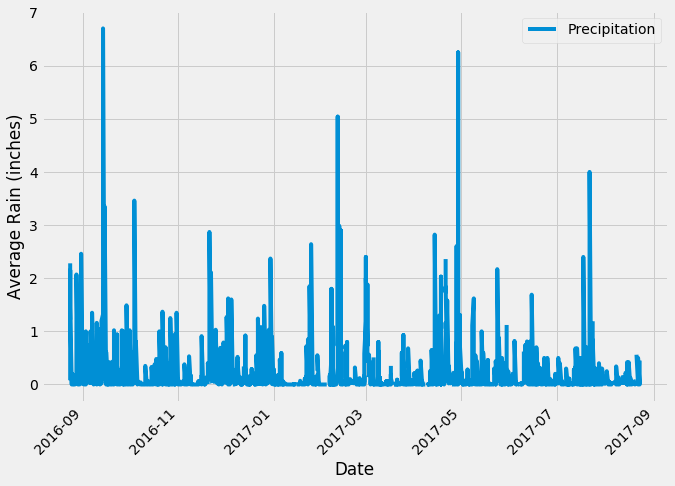

In [65]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
first_date = dt.date(2017,8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
one_year = (
    session
    .query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date > first_date)
    .order_by(Measurement.date)
   ).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(one_year, columns=['Date', 'Precipitation'])
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'], format='%Y/%m/%d')
precipitation_df = precipitation_df.set_index('Date')


# Sort the dataframe by date

# CS sorted on query

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(10,8))
precipitation_df.plot(x_compat=True,rot=45,ax=ax)
ax.set(xlabel='Date',ylabel='Average Rain (inches)')


In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [68]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(Station.station).count()
print(f"There are a total of: {total_stations} stations")


There are a total of: 9 stations


In [103]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_obs = (
    session
    .query(Measurement.station, func.count(Measurement.tobs))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.tobs)
    .desc()
    )).all()

#print(station_obs.statement)


stationobsdf = pd.DataFrame(station_obs, columns=['Station', 'Number of Observations'])

stationobsdf.head()
top_station = stationobsdf.iloc[0]['Station']
print(f"The top station was {top_station} with {stationobsdf.iloc[0]['Number of Observations']} Observations" )


The top station was USC00519281 with 2772 Observations


In [105]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
highestobs = (
    session
    .query(Measurement.date, Measurement.tobs)
    .filter(Measurement.station == top_station)
    .filter(Measurement.date > first_date)
    .order_by(Measurement.date)).all()

highestobsdf = pd.DataFrame(highestobs, columns=['Station', 'Temperature'])
highestobsdf['Temperature'].describe()

print(f"The Minimum recorded Temperature was {highestobsdf['Temperature'].min()}")
print(f"The Maximimum recorded Temperature was {highestobsdf['Temperature'].max()}")
print(f"The Mean recorded Temperature was {highestobsdf['Temperature'].mean()}")





The Minimum recorded Temperature was 59.0
The Maximimum recorded Temperature was 83.0
The Mean recorded Temperature was 73.0968660968661


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Temperature')]

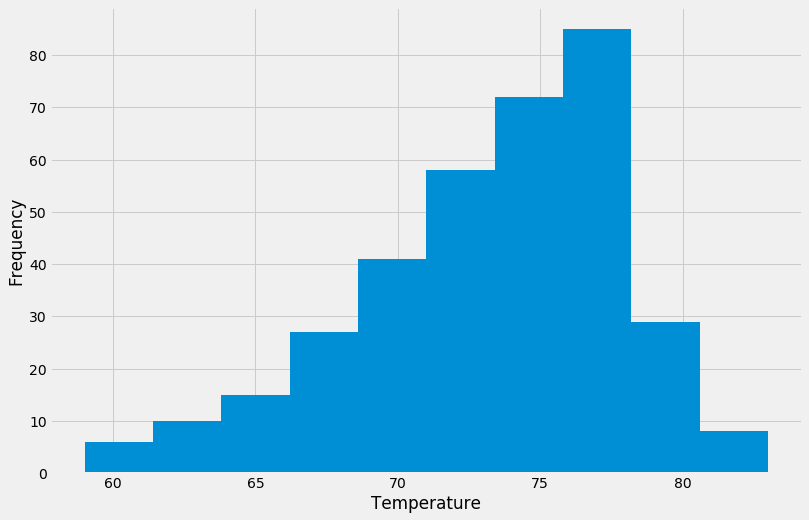

In [101]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
fig, ax = plt.subplots(figsize=(12,8))
highestobsdf.plot.hist('Temperature',ax=ax,legend=False)
ax.set(xlabel='Temperature',ylabel='Frequency')



## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
